# Trees - Exercises

- Use the golf data to perform some basic calculations on decision tree learning
    - Entropy on the first node of the tree when the learning process starts
    - Best categorical test
    - Possible tests for Temperature
- Obtain a tree with sklearn from the golf data
    - Plot the tree
    - See the tree as text
- Compare zero-one error and cross-entropy in one extreme case
    - Consider that a dataset has 2 classes distributed as <40,80>.
        - Calculate zero one error and entropy of this set of cases
    - The first test splits the dataset in <28,42> and <12,48>
        - Did the situation improve?
        - What is the weigthed average error of the 2 nodes after the split?
        - What is the weighted entropy of the 2 nodes after the split?
        - How do you compare the response of error and entropy in this case?
- Observe how the log2 of the number of terminal nodes varies with cost-complexity parameter using a simple dataset like iris.
- Use cross-validation to observe how we can control overfitting with the cost-complexity parameter.
- Compare the performance of bagging with a single tree


In [180]:
import pandas as pd
import numpy as np

data = pd.read_csv('../Problems/Golf/golf.csv')
data.drop(['Play'],axis=1)

,Outlook,Temperature,Humidity,Windy
0,sunny,85,85,False
1,sunny,80,90,True
2,overcast,83,78,False
3,rain,70,96,False
4,rain,68,80,False
5,rain,65,70,True
6,overcast,64,65,True
7,sunny,72,95,False
8,sunny,69,70,False
9,rain,75,80,False


## Scikitlearn does not take categorical variables as input

In [181]:
from sklearn.tree import DecisionTreeClassifier as DTC
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import plot_tree 

# sklearn's implementation does not take categorical predictors directly
# pandas.DataFrame.apply applies a function to given axis (0 by default)
# LabelEncoder encodes class labels with values between 0 and n-1
X = np.array(data.drop(['Play'],axis=1).apply(LabelEncoder().fit_transform))
y = np.array(data['Play'])


## Plotting the tree with options

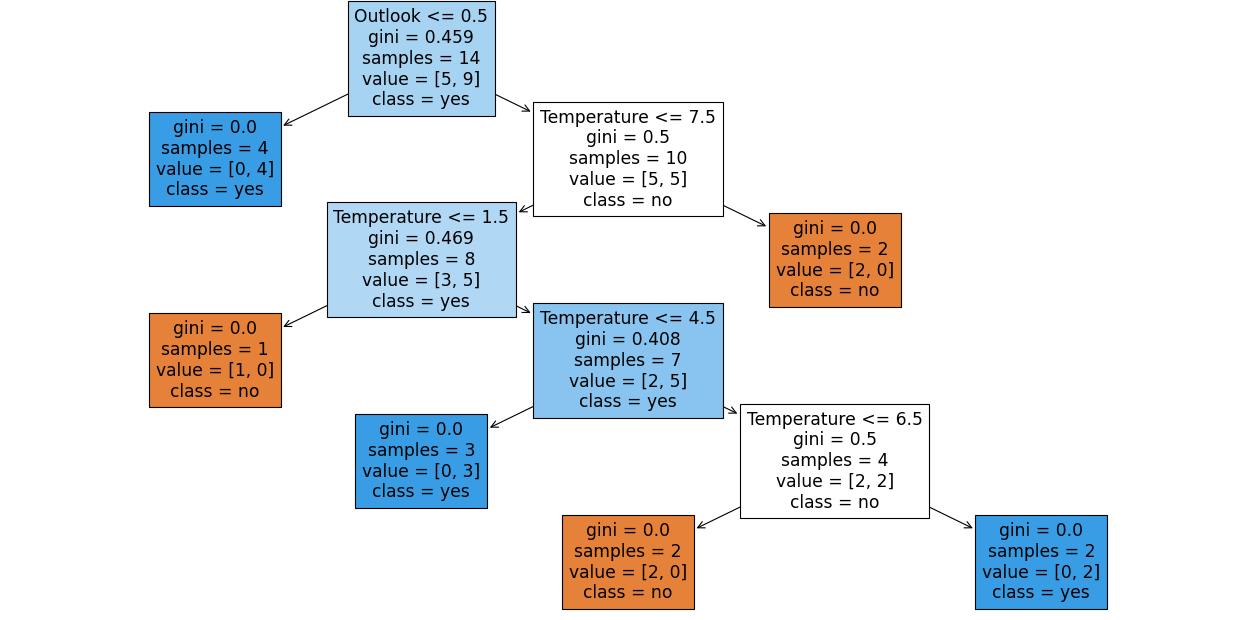

In [186]:
from matplotlib.pyplot import figure

figure(num=None, figsize=(20, 10), dpi=80)

tree=DTC().fit(X,y)

# visualize a tree using tree_plot options

plot_tree(tree, 
          feature_names=data.columns,
          class_names=data['Play'].unique(),
          filled=True);

# https://tomaszgolan.github.io/introduction_to_machine_learning/markdown/introduction_to_machine_learning_02_dt/introduction_to_machine_learning_02_dt/

## Variable binarization

- Would the binarization of the multivalued var result in a different tree?
    - In this case we obtain a tree with the same number of leaves

In [187]:
from sklearn.preprocessing import MultiLabelBinarizer

mlb = MultiLabelBinarizer()
valdict={'sunny': 's', 'overcast': 'o', 'rain':'r'}
colm=data['Outlook'].map(valdict)
X_Outlook = pd.DataFrame(mlb.fit_transform(colm),columns=valdict.keys())
X2=np.concatenate((X_Outlook,X[:,1:4]),axis=1)
X2


array([[ 0,  0,  1, 11,  5,  0],
       [ 0,  0,  1,  8,  6,  1],
       [ 1,  0,  0, 10,  3,  0],
       [ 0,  1,  0,  4,  8,  0],
       [ 0,  1,  0,  2,  4,  0],
       [ 0,  1,  0,  1,  1,  1],
       [ 1,  0,  0,  0,  0,  1],
       [ 0,  0,  1,  6,  7,  0],
       [ 0,  0,  1,  3,  1,  0],
       [ 0,  1,  0,  7,  4,  0],
       [ 0,  0,  1,  7,  1,  1],
       [ 1,  0,  0,  6,  6,  1],
       [ 1,  0,  0,  9,  2,  0],
       [ 0,  1,  0,  5,  4,  1]])

In [93]:
list(data.columns[1:4])

['Temperature', 'Humidity', 'Windy']

[Text(826.6666666666666, 553.6666666666666, 'sunny <= 0.5\ngini = 0.459\nsamples = 14\nvalue = [5, 9]\nclass = yes'),
 Text(620.0, 453.0, 'Temperature <= 7.5\ngini = 0.5\nsamples = 10\nvalue = [5, 5]\nclass = no'),
 Text(413.3333333333333, 352.3333333333333, 'Temperature <= 1.5\ngini = 0.469\nsamples = 8\nvalue = [3, 5]\nclass = yes'),
 Text(206.66666666666666, 251.66666666666663, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]\nclass = no'),
 Text(620.0, 251.66666666666663, 'Temperature <= 4.5\ngini = 0.408\nsamples = 7\nvalue = [2, 5]\nclass = yes'),
 Text(413.3333333333333, 151.0, 'gini = 0.0\nsamples = 3\nvalue = [0, 3]\nclass = yes'),
 Text(826.6666666666666, 151.0, 'Temperature <= 6.5\ngini = 0.5\nsamples = 4\nvalue = [2, 2]\nclass = no'),
 Text(620.0, 50.33333333333326, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]\nclass = no'),
 Text(1033.3333333333333, 50.33333333333326, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]\nclass = yes'),
 Text(826.6666666666666, 352.3333333333333, 'gini = 0.0\nsamp

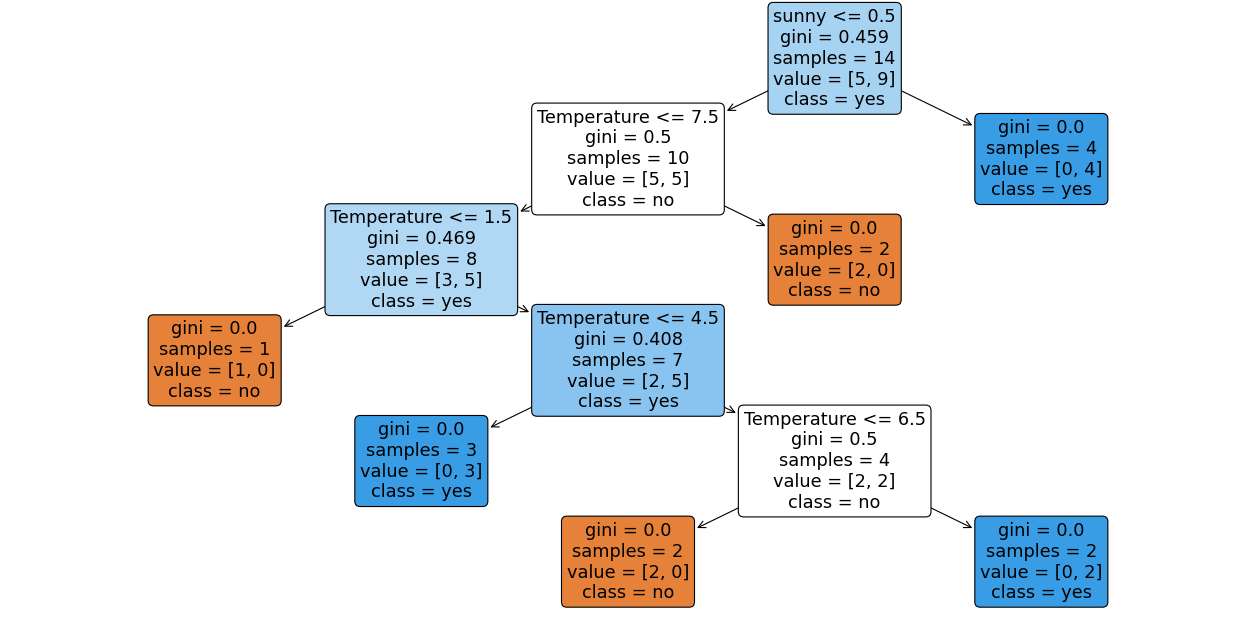

In [189]:
tree=DTC().fit(X2,y)

figure(num=None, figsize=(20, 10), dpi=80)

plot_tree(tree, 
          feature_names=list(valdict.keys())+list(data.columns[1:4]),
          class_names=data['Play'].unique(),
          filled=True,
          rounded=True)


## Studying tree size

- Obtain number of leaves
- How does it change with ccp_alpha and other hyper parameters controlling tree size?
- How does predictive performance (cross validation) change with number of leaves?
- And with max_depth, etc.?

In [194]:
from sklearn.datasets import fetch_california_housing
from sklearn.datasets import load_boston
from sklearn.tree import DecisionTreeRegressor as DTR

data = load_boston()
X=data.data
y=data.target

tree=DTR(ccp_alpha=1).fit(X,y)
tree.get_n_leaves()

9

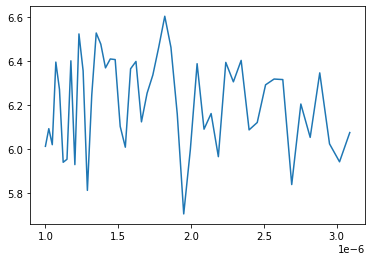

In [202]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import BaggingRegressor as BagR
import matplotlib.pyplot as plt

ccpexp=np.arange(-6,-5.5,.01)
ccp=10**ccpexp

def score_tree(c):
    tree=DTR(ccp_alpha=c)
    return np.mean(-cross_val_score(tree,X,y,cv=5,scoring='neg_root_mean_squared_error'))

def score_bag(c):
    treebag=BagR(DTR(ccp_alpha=c))
    return np.mean(-cross_val_score(treebag,X,y,cv=5,scoring='neg_root_mean_squared_error'))

error = list(map(score_tree,ccp))
#error = list(map(score_bag,ccp))

plt.plot(ccp,error);

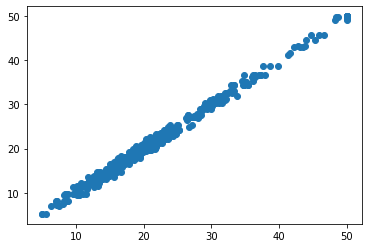

In [201]:
tree=DTR(ccp_alpha=0.01).fit(X,y)
plt.scatter(y,tree.predict(X));

## The effect of bagging

Bagging reduces the error of the tree without pruning (compare with ccp_alpha=0).

- Variance is reduced
- Overfitting is reduced

In [224]:
tree=DTR(ccp_alpha=0.0003)
treebag=BagR(DTR(ccp_alpha=0.0000002))
(np.mean(-cross_val_score(tree,X,y,cv=5,scoring='neg_root_mean_squared_error')),
    np.mean(-cross_val_score(treebag,X,y,cv=5,scoring='neg_root_mean_squared_error')))

(6.165690549048541, 4.29843183924312)